# Loading your own data - TF2.X

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
cv2.__version__

'4.9.0'

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [4]:
directory = '/Users/apple/Documents/Projects-Python/DeepLearningCode/src/notebook/00-Prerequisites/resources/pics/'

classes = ["dogs", "cats"]

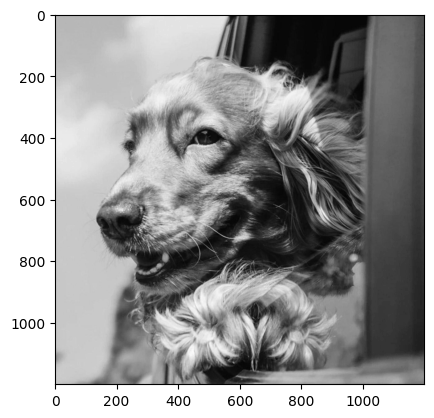

In [5]:
for i in classes:
    path = os.path.join(directory,i)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray') 
        plt.show()

        break
    break 

In [6]:
print(img_array)

[[170 170 170 ...  76  77  78]
 [170 170 170 ...  76  77  78]
 [170 170 170 ...  76  77  78]
 ...
 [181 181 181 ... 112 112 112]
 [179 179 179 ... 111 111 111]
 [178 178 178 ... 111 111 111]]


In [7]:
print(img_array.shape)

(1200, 1200)


## Standardization of the data:

In [8]:
img_size = 100

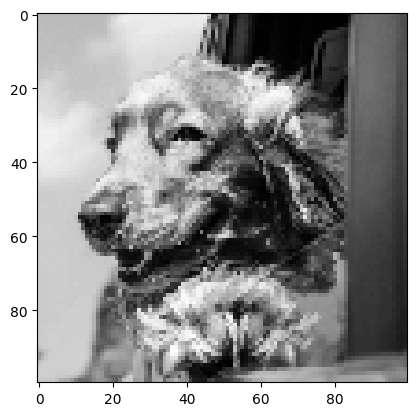

In [9]:
new_img = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_img, cmap='gray')
plt.show()

## Creating Training Data:

In [10]:
training_data = []

def create_training_data():
    for category in classes:

        path = os.path.join(directory,category)  # create path to dogs and cats
        class_num = classes.index(category)  # 0=dog 1=cat

        for img in os.listdir(path):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_img = cv2.resize(img_array, (img_size, img_size))  # resize to normalize data size
                training_data.append([new_img, class_num])  # add this to our training_data
            except Exception as e: 
                pass

In [11]:
create_training_data()

In [12]:
print(len(training_data))

558


In [13]:
import random
random.shuffle(training_data)

In [14]:
X = []
y = []

In [15]:
for features,label in training_data:
    X.append(features)
    y.append(label)

In [16]:
print(X[0].reshape(-1, img_size, img_size, 1))

[[[[251]
   [252]
   [252]
   ...
   [205]
   [203]
   [203]]

  [[253]
   [252]
   [252]
   ...
   [203]
   [202]
   [203]]

  [[251]
   [251]
   [250]
   ...
   [206]
   [206]
   [206]]

  ...

  [[222]
   [221]
   [214]
   ...
   [189]
   [180]
   [181]]

  [[216]
   [216]
   [214]
   ...
   [190]
   [180]
   [181]]

  [[214]
   [217]
   [219]
   ...
   [193]
   [185]
   [178]]]]


In [17]:
y

[1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [18]:
X = np.array(X).reshape(-1, img_size, img_size, 1)

In [19]:
X.shape

(558, 100, 100, 1)

## Saving the data:

In [23]:
import pickle

In [25]:
pickle_out = open("/Users/apple/Documents/Projects-Python/DeepLearningCode/src/notebook/computer_vision/data/X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [26]:
pickle_out = open("/Users/apple/Documents/Projects-Python/DeepLearningCode/src/notebook/computer_vision/data/y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

## Load the data:

In [27]:
pickle_in = open("/Users/apple/Documents/Projects-Python/DeepLearningCode/src/notebook/computer_vision/data/X.pickle","rb")
X = pickle.load(pickle_in)

In [28]:
pickle_in = open("/Users/apple/Documents/Projects-Python/DeepLearningCode/src/notebook/computer_vision/data/y.pickle","rb")
y = pickle.load(pickle_in)

In [32]:
X.shape

(1, 100, 100, 1)